In [1]:
import os
import glob
import pandas as pd

In [2]:
# Define working directory
os.chdir(r"C:\Users\Cristina Bardan\Desktop\Repositories\FinalProject-Spotify\Original_data")

In [3]:
# Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# Combine all files in the list and export as CSV
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.reset_index(drop=True, inplace=True)

In [4]:
df2 = df.drop(['track', 'artist', 'uri'], axis=1)

In [5]:
#Validation of correlation between variables
import numpy as np 
df3=df2.corr()
df3.sort_values('target').target

instrumentalness   -0.407638
acousticness       -0.246036
duration_ms        -0.073820
sections           -0.059997
liveness           -0.051445
chorus_hit         -0.046409
speechiness        -0.040835
key                 0.009883
tempo               0.032649
mode                0.079614
time_signature      0.104884
energy              0.177142
valence             0.251147
loudness            0.286034
danceability        0.346097
target              1.000000
Name: target, dtype: float64

In [6]:
selected_index = df3[(df3.target >= 0.1) | (df3.target <= -0.1)].index.values
selected_index

array(['danceability', 'energy', 'loudness', 'acousticness',
       'instrumentalness', 'valence', 'time_signature', 'target'],
      dtype=object)

In [7]:
# duration_ms sections liveness chorus_hit speechiness key tempo     mode         
data = df2[selected_index].copy()
X = data.iloc[:,:-1]
y = data.target
print(X.shape, y.shape)

(41106, 7) (41106,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## Data Preprocessing

In [9]:
#Scale features (X) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

X_train_scaled

array([[7.89473684e-01, 5.22833946e-01, 7.61722362e-01, ...,
        6.29000000e-02, 8.58433735e-01, 8.00000000e-01],
       [5.40485830e-01, 8.30941168e-01, 7.79213918e-01, ...,
        2.30000000e-04, 9.65863454e-01, 8.00000000e-01],
       [5.00000000e-01, 6.65883728e-01, 7.45513897e-01, ...,
        5.69000000e-05, 7.01807229e-01, 8.00000000e-01],
       ...,
       [5.76923077e-01, 3.67779987e-01, 6.83038663e-01, ...,
        0.00000000e+00, 4.46787149e-01, 8.00000000e-01],
       [4.19028340e-01, 1.60707926e-01, 5.08198577e-01, ...,
        2.23000000e-04, 4.24698795e-01, 8.00000000e-01],
       [2.95546559e-01, 2.48738561e-01, 6.79378078e-01, ...,
        4.43000000e-05, 1.07429719e-01, 6.00000000e-01]])

One-hot encode the labels

In [10]:
#One-hot encode output labels (y)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Creating and defining our Deep Learning Model Architecture

In [11]:
#Create a sequential model
from tensorflow.keras.models import Sequential
model = Sequential() 

from tensorflow.keras.layers import Dense
number_inputs = 7

#Create hidden layers
model.add(Dense(units=14,activation='relu', input_dim=number_inputs))
model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=80,activation='relu'))

#Create output layer
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax')) 

Number of Hidden Nodes 
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

In [12]:
#Model Summary
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 162       
Total params: 11,754
Trainable params: 11,754
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compile the Model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [14]:
print(X.shape, y.shape)

(41106, 7) (41106,)


In [15]:
#Training the Model
history = model.fit(X_train_scaled, y_train_categorical, epochs=500, batch_size=2000, shuffle=True, verbose=2)
# thing = model.predict()

Epoch 1/500
16/16 - 0s - loss: 0.6336 - accuracy: 0.6917
Epoch 2/500
16/16 - 0s - loss: 0.5607 - accuracy: 0.7124
Epoch 3/500
16/16 - 0s - loss: 0.5354 - accuracy: 0.7289
Epoch 4/500
16/16 - 0s - loss: 0.5284 - accuracy: 0.7327
Epoch 5/500
16/16 - 0s - loss: 0.5243 - accuracy: 0.7354
Epoch 6/500
16/16 - 0s - loss: 0.5211 - accuracy: 0.7361
Epoch 7/500
16/16 - 0s - loss: 0.5206 - accuracy: 0.7347
Epoch 8/500
16/16 - 0s - loss: 0.5173 - accuracy: 0.7372
Epoch 9/500
16/16 - 0s - loss: 0.5159 - accuracy: 0.7385
Epoch 10/500
16/16 - 0s - loss: 0.5140 - accuracy: 0.7392
Epoch 11/500
16/16 - 0s - loss: 0.5129 - accuracy: 0.7393
Epoch 12/500
16/16 - 0s - loss: 0.5117 - accuracy: 0.7404
Epoch 13/500
16/16 - 0s - loss: 0.5103 - accuracy: 0.7400
Epoch 14/500
16/16 - 0s - loss: 0.5094 - accuracy: 0.7417
Epoch 15/500
16/16 - 0s - loss: 0.5083 - accuracy: 0.7426
Epoch 16/500
16/16 - 0s - loss: 0.5081 - accuracy: 0.7419
Epoch 17/500
16/16 - 0s - loss: 0.5067 - accuracy: 0.7436
Epoch 18/500
16/16 - 0s

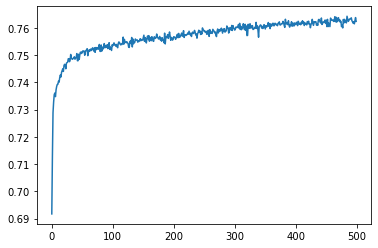

In [16]:
from matplotlib import pyplot as plt 
# print(history.history.keys())

plt.plot(history.history['accuracy'])

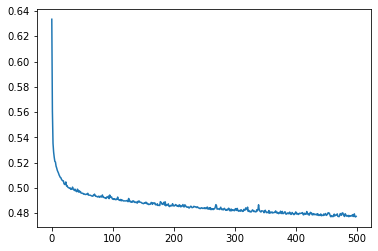

In [17]:
plt.plot(history.history['loss'])

## Validation of the Model

In [18]:
#Evaluate the Model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
    
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - loss: 0.4903 - accuracy: 0.7595
Loss: 0.49026620388031006, Accuracy: 0.7594628930091858


## Saving the Trained Model

In [19]:
# # Save the model
# Define working directory
model.save("../Models/h5/corr01.h5")